In [44]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from costs import * 
from least_squares import * 
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the training data into feature matrix, class labels, and event ids:

In [55]:
from proj1_helpers import *
DATA_TRAIN_PATH = 'train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)
tX_tra = tX.T
#conc = np.column_stack((y, tX))
#conc_filtered = conc[~(conc == -999).any(1)]
#y = conc_filtered[:,0]
#tX = conc_filtered[:,1:]'''

## Do your thing crazy machine learning thing here :) ...

# Raw Data Analysis 

### Visualisation of the data

[ 138.47   160.937 -999.    ...,  105.457   94.951 -999.   ]


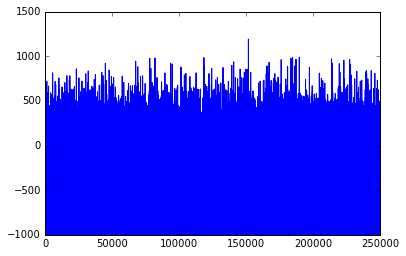

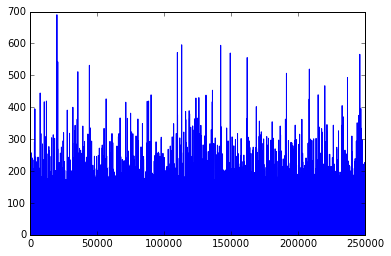

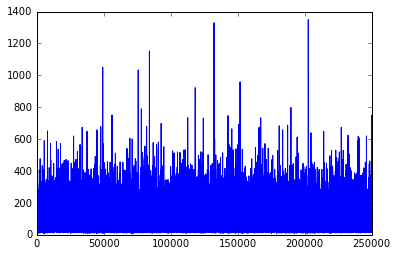

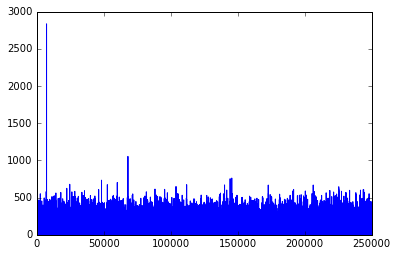

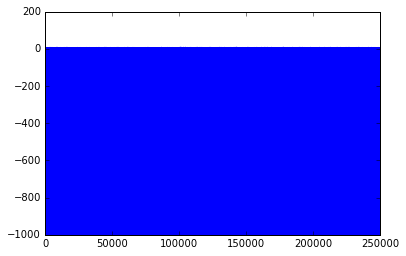

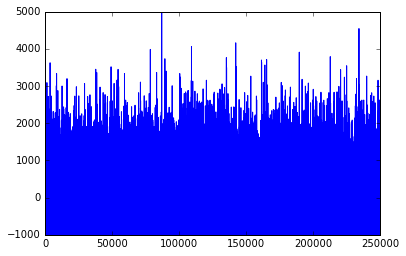

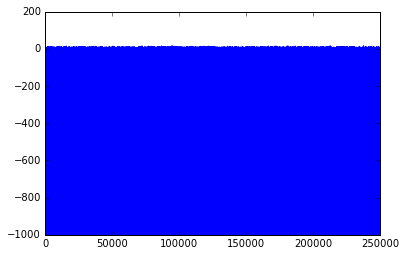

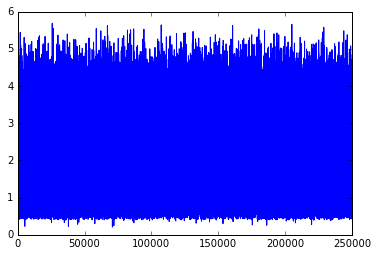

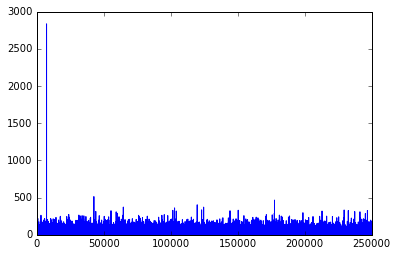

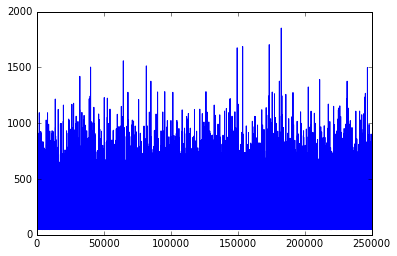

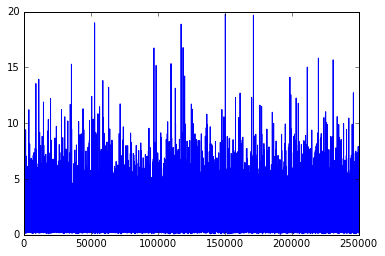

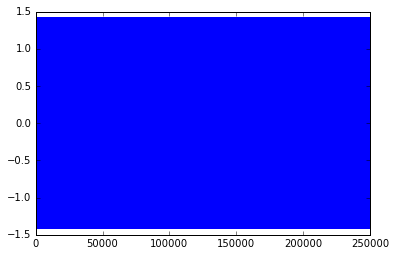

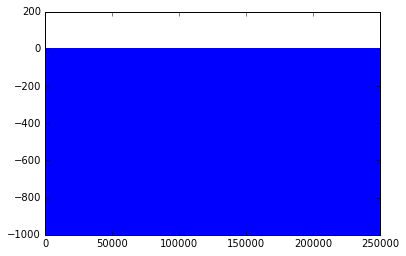

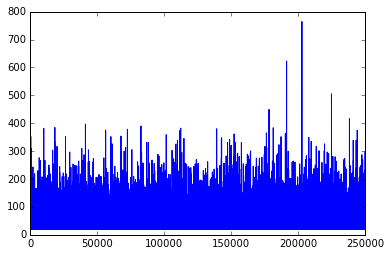

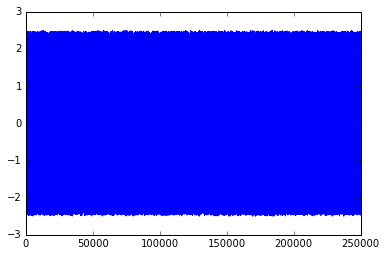

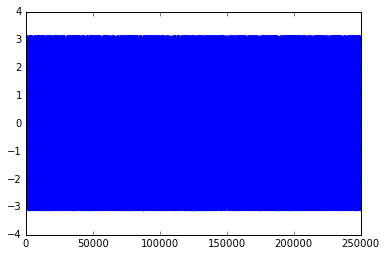

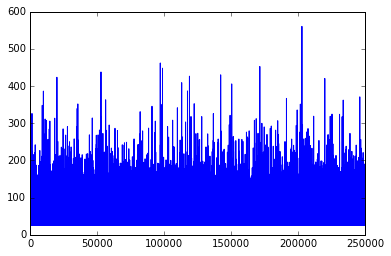

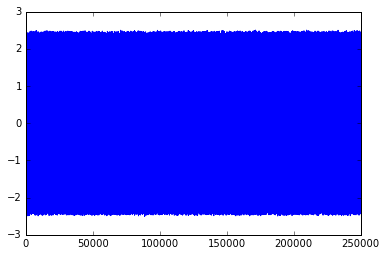

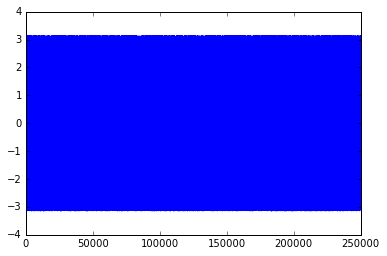

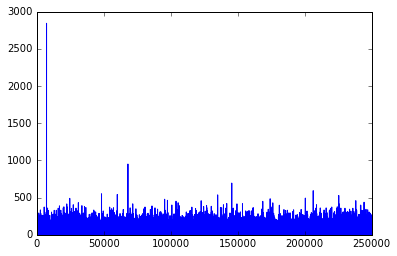

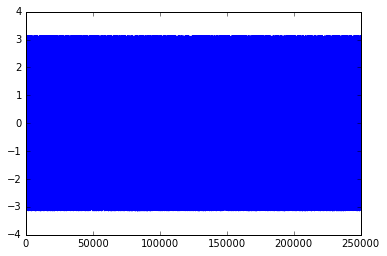

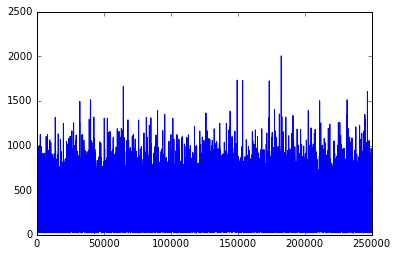

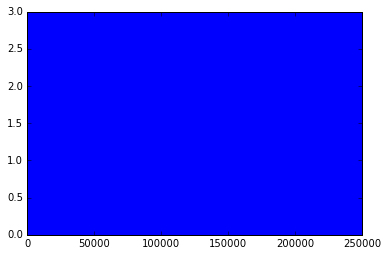

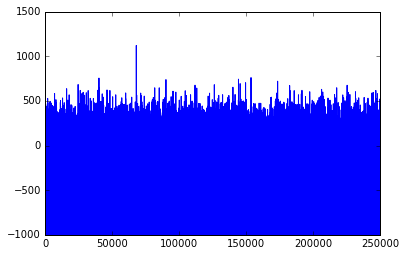

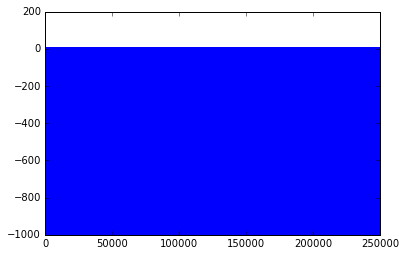

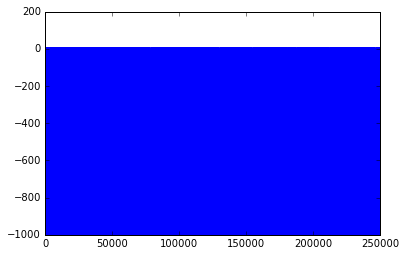

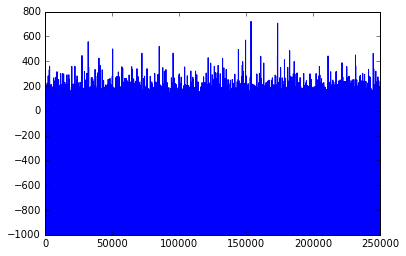

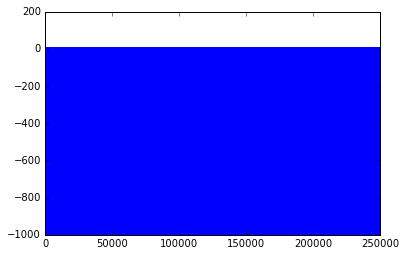

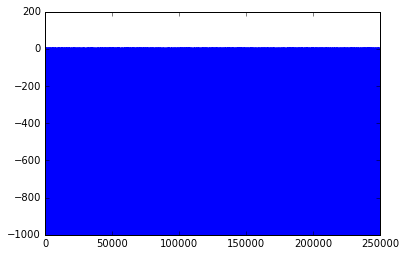

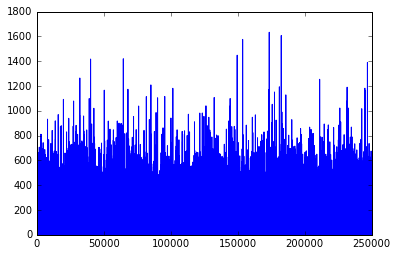

In [54]:
for x in tX_tra:
    plt.plot(x)
    plt.show()

In [ ]:
#Boxplot of the Raw Data
# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(tX_tra)

ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

axes = plt.gca()
axes.set_ylim([-2000,6000])


## Data scaling 

In [30]:
minmax_tX = (tX_tra - tX_tra.min()) / (tX_tra.max() - tX_tra.min())
print(minmax_tX)

[[ 0.19040408  0.17587189  0.18360075 ...,  0.16743279  0.16681093
   0.18622379]
 [ 0.19416489  0.17873648  0.18450601 ...,  0.          0.          0.17496312]
 [ 0.          0.19437162  0.18830883 ...,  0.          0.          0.17463252]
 ..., 
 [ 0.18487795  0.17735683  0.17992012 ...,  0.          0.          0.17425438]
 [ 0.18311932  0.17046628  0.17874385 ...,  0.          0.          0.16722523]
 [ 0.          0.17940405  0.17908181 ...,  0.          0.          0.16722523]]


##### Boxplot of the scale data

(-1, 1)

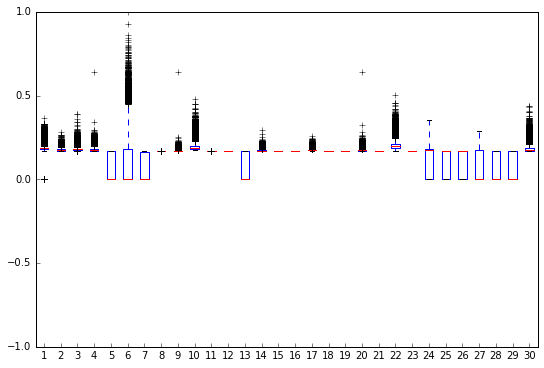

In [31]:
#Boxplot of the Normalized Data
# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(minmax_tX)

ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

axes = plt.gca()
axes.set_ylim([-1,1])

## Data standardization

In [32]:
#np.mean(tX, axis=0)
centered_tX_tra = tX_tra - np.mean(tX_tra, axis=0)
std_tX_tra = centered_tX_tra / np.std(centered_tX_tra, axis=0)

print(std_tX_tra, "\n\n", np.mean(std_tX_tra, axis=0), "\n\n", np.std(std_tX_tra, axis=0))

[[ 0.46141372  0.06833197  0.40768027 ...,  1.5668      1.55858439
   0.4125105 ]
 [ 0.51670419  0.55250482  0.54013641 ..., -0.63936657 -0.63936694
  -0.27381996]
 [-2.33785898  3.19515553  1.09655998 ..., -0.63936657 -0.63936694
  -0.29396985]
 ..., 
 [ 0.38016991  0.31931645 -0.13086367 ..., -0.63936657 -0.63936694
  -0.31701723]
 [ 0.35431502 -0.84532397 -0.30297338 ..., -0.63936657 -0.63936694
  -0.74543941]
 [-2.33785898  0.66533608 -0.25352276 ..., -0.63936657 -0.63936694
  -0.74543941]] 

 [ -2.63465694e-15   4.50019089e-15  -3.48448848e-15   7.19675786e-15
  -2.72244716e-14  -3.48856766e-15   1.33668259e-14   2.16429719e-14
   6.39742126e-15   2.86409207e-15  -7.00447966e-15   4.45924897e-15
  -1.36393998e-14  -5.96492045e-15   1.35646161e-16   7.13136217e-17
   2.58030370e-14  -1.06327391e-16  -1.87188487e-16   8.24369382e-15
   1.41040513e-16  -9.00283004e-15  -6.01698247e-16  -5.68357095e-15
   3.38428841e-15  -1.72635239e-15  -1.00691633e-14   2.10324860e-14
  -5.81535886e

##### Boxplot of the Standardized data

(-20, 40)

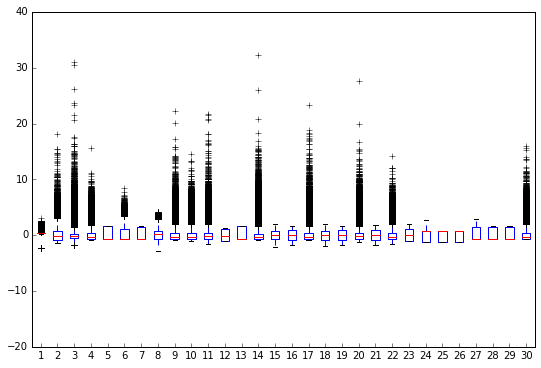

In [33]:
#Boxplot of the Normalized Data
# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(std_tX_tra)

ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

axes = plt.gca()
axes.set_ylim([-20,40])

## Scatter plots

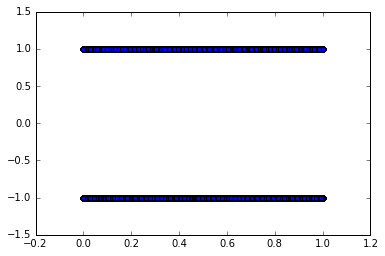

In [34]:
res = np.column_stack((y, tX[:,12])) # Change with tX[:,i] to plot y against the ith col of tX
res_filt = res[res[:,1] != -999]
plt.scatter(res_filt[:,1], res_filt[:,0])
plt.show()

## Correlations (not useful?)

In [35]:
for i,col in zip(range(std_tX.T.shape[0]),std_tX.T):
    vec = np.column_stack((y,col))
    #vec_filtered = vec[vec[:,1] > -998]
    print(i, np.corrcoef(vec.T)[0,1])

0 0.239149057892
1 -0.351427955862
2 -0.0140552737849
3 0.192526328569
4 0.141645992566
5 0.191766088075
6 0.140554400465
7 0.0122454812855
8 -0.0152874266878
9 0.153235932476
10 -0.195397896183
11 0.271751877052
12 0.141345988596
13 0.235237975878
14 -0.000943251058212
15 -0.00440253868639
16 -0.0319475868053
17 0.00151623537706
18 0.00412544741152
19 0.0224657515108
20 0.00747534218859
21 0.135520261523
22 0.133549123082
23 0.157604145676
24 0.15046926005
25 0.150468037793
26 0.14071436695
27 0.141264913776
28 0.141255686505
29 0.134295726669


### Least Squares

In [45]:
mse, w = least_squares(y, tX)
print(w)
print(mse)

[  8.03911103e-05  -7.20111773e-03  -6.05471144e-03  -5.47536204e-04
  -1.93854515e-02   4.73443447e-04  -2.60377713e-02   3.25108467e-01
  -3.81085734e-05  -2.72787181e+00  -2.21219603e-01   9.50810773e-02
   6.40330195e-02   2.73613146e+00  -3.31801854e-04  -9.54327420e-04
   2.74088821e+00  -5.34165287e-04   9.73498892e-04   3.69225050e-03
   3.54487161e-04  -5.43344617e-04  -3.30448034e-01  -1.40800496e-03
   8.31432873e-04   1.02117271e-03  -1.68047418e-03  -5.83664769e-03
  -1.11088005e-02   2.72833175e+00]
0.339686809915


## Generate predictions and save ouput in csv format for submission:

In [3]:
DATA_TEST_PATH = 'test.csv' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [4]:
OUTPUT_PATH = 'sample-submission.csv' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, tX_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

NameError: name 'weights' is not defined